# <font color=maroon> Project of Analytics Service Development </font>

### <font color=blue>Project Title:</font> <font color=orange>The effect of data augmentation in classifying weapons using CNN </font>

##### Project Members: <font color=green>Shohidul Haque</font>, <font color=maroon>Rabbil Bhuiyan</font> and <font color=blue>Jahadul Khan</font>


Presented on 08.05.2020

#### <font color=orange>Importing packages</font>

In [2]:
# Import necessary libraies
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
import itertools
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

#### <font color=orange>Organization of data</font>

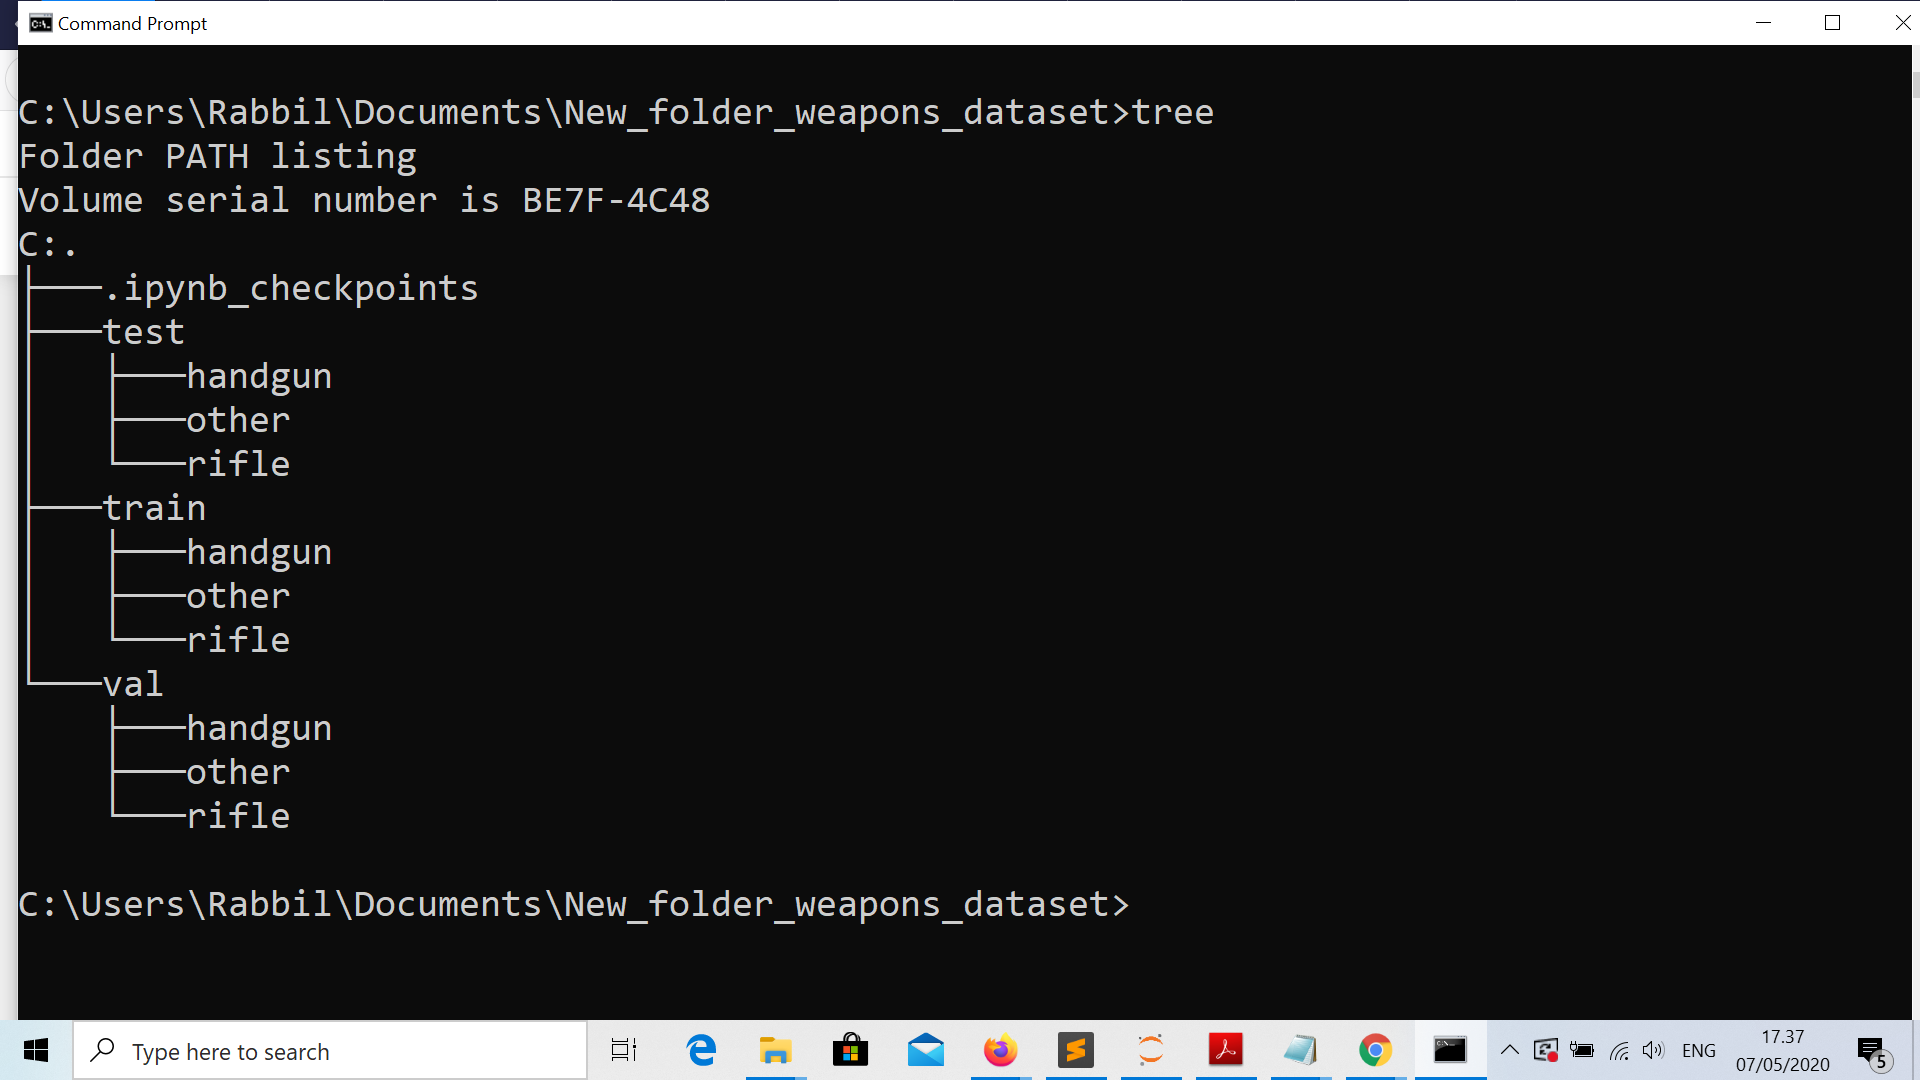

In [58]:
# Loading data
train_path = 'C:/Users/Rabbil/Documents/New_folder_weapons_dataset/train'
valid_path = 'C:/Users/Rabbil/Documents/New_folder_weapons_dataset/val'
test_path = 'C:/Users/Rabbil/Documents/New_folder_weapons_dataset/test'

# The dataset has the following directory structure
Image(filename= "data_directories.png", width=700, height= 500)

#### <font color=orange>Setting up variables (data preprocessing)</font>

In [5]:
# creating variables
img_width, img_height = 150, 150  # dimensons of our images

train_samples = 5000 
validation_samples= 400
test_samples = 200
classes = ['handgun', 'rifle']
epochs = 30 
batch_size = 20

# Check the data wheter the format is right
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3) #150,150,3

In [20]:
input_shape

(150, 150, 3)

#### <font color=orange>Data preparation </font>

In [10]:
# creating batches of data (images) using keras ImageDataGenerator class
train_batches = ImageDataGenerator().flow_from_directory(
    directory =train_path, 
    shuffle = True,
    target_size = (img_width, img_height),
    classes =['handgun', 'rifle'], 
    batch_size = batch_size)

Found 16342 images belonging to 2 classes.


In [11]:
valid_batches = ImageDataGenerator().flow_from_directory(
    directory=valid_path,
    shuffle=True,
    target_size= (img_width, img_height),
    classes= classes, 
    batch_size= batch_size)

Found 3503 images belonging to 2 classes.


In [12]:
test_batches = ImageDataGenerator().flow_from_directory(
    directory=test_path, 
    shuffle=True,
    target_size=(img_width, img_height),
    classes= classes, 
    batch_size= batch_size)

Found 3503 images belonging to 2 classes.


#### <font color=orange>Vizualizing training images</font>

In [21]:
# generating a batch of images and labels from the training set
imgs, labels = next(train_batches)

- The return value of next function is in form of (x_train, y_train) 
- where x_train is training features and y_train is labels

In [22]:
imgs.shape, labels.shape

((20, 150, 150, 3), (20, 2))

In [23]:
# Function of plotting images
def plot_images(imgs, labels=labels, rows=1, figsize=(20,8), fontsize=14):
    figure = plt.figure(figsize=figsize)
    cols = max(1,len(imgs) // rows-1)
    labels_present = False
    # checking if labels is a numpy array
    if type(labels).__module__ == np.__name__:
        labels_present=labels.any()
    elif labels:
        labels_present=True
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols+1, i+1)
        # axis off, but leave a bounding box
        plt.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            left='off',
            right='off',
            labelbottom='off',
            labelleft='off')
        # plot labels if present
        if labels_present:
            subplot.set_title(labels[i], fontsize=fontsize)
        plt.imshow(imgs[i][:,:,0], cmap='viridis')
        
    plt.show()

C:\Users\Rabbil\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


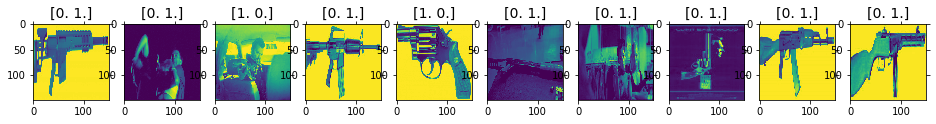

In [24]:
plot_images(imgs[0:10], rows=1, figsize=(16,12))

- Here handguns are represented with the one-hot encoding of [1, 0], 
- and rifles are represented by [0,1]

#### <font color=orange>Build and train Convolution Neuron Network (CNN)</font>

##### <font color=blue>Build a simple CNN</font>

In [26]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape= input_shape),
    Flatten(),
    Dense(2, activation='softmax'),
    ])

- The model consists of one convolution block 
- We keep it simple as baseline model 

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 700928)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1401858   
Total params: 1,402,754
Trainable params: 1,402,754
Non-trainable params: 0
_________________________________________________________________


#### <font color=blue>Compile the model</font>

In [27]:
# compiling the model
model.compile(optimizer=Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### <font color=blue>Train the model (simple CNN)</font>
- Use the fit_generator method of the ImageDataGenerator class to train the network

In [15]:
history = model.fit_generator(generator=train_batches, 
                    steps_per_epoch=train_samples // batch_size,
                    epochs = epochs,
                    validation_data=valid_batches, 
                    validation_steps= validation_samples // batch_size, 
                    verbose=2)


Epoch 1/30
 - 126s - loss: 124.7617 - accuracy: 0.6186 - val_loss: 61.6632 - val_accuracy: 0.6750
Epoch 2/30
 - 109s - loss: 29.8585 - accuracy: 0.6438 - val_loss: 19.9762 - val_accuracy: 0.6500
Epoch 3/30
 - 110s - loss: 17.6157 - accuracy: 0.6418 - val_loss: 7.4572 - val_accuracy: 0.6175
Epoch 4/30
 - 102s - loss: 6.0699 - accuracy: 0.7246 - val_loss: 7.6079 - val_accuracy: 0.6900
Epoch 5/30
 - 114s - loss: 4.2142 - accuracy: 0.7468 - val_loss: 3.3981 - val_accuracy: 0.6350
Epoch 6/30
 - 107s - loss: 3.3029 - accuracy: 0.7410 - val_loss: 2.1265 - val_accuracy: 0.6625
Epoch 7/30
 - 108s - loss: 2.2062 - accuracy: 0.7852 - val_loss: 1.0398 - val_accuracy: 0.6625
Epoch 8/30
 - 107s - loss: 2.0510 - accuracy: 0.8057 - val_loss: 4.2833 - val_accuracy: 0.6250
Epoch 9/30
 - 116s - loss: 1.6880 - accuracy: 0.7966 - val_loss: 2.5609 - val_accuracy: 0.6606
Epoch 10/30
 - 112s - loss: 1.6355 - accuracy: 0.7948 - val_loss: 4.5760 - val_accuracy: 0.6100
Epoch 11/30
 - 103s - loss: 1.1617 - accur

In [28]:
## Saving model

In [29]:
model.save('baseline_CNNmodel.h5')

#### <font color=orange>Vizualize the training results</font>

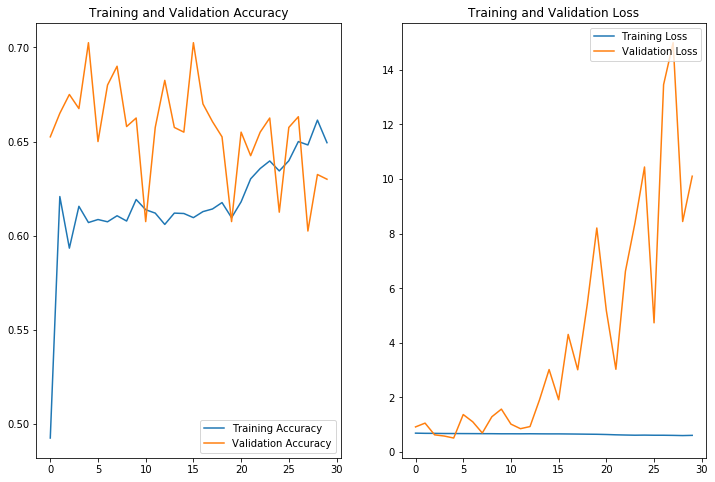

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

-  We see that training accuracy and validation accuracy are off by large margin 
-  The model has achieved only around 65% accuracy on the validation set.
-  The difference in accuracy between training and validation is noticeable—a sign of overfitting.
-  It means that the model will have a difficult time generalizing on a new dataset due to overfitting.
-  One way to overcome overfitting is data augmentation.

### <font color=orange>Predictions </font>

In [31]:
# preparing the test data
test_imgs, test_labels = next(test_batches)

In [32]:
test_imgs.shape, test_labels.shape

((20, 150, 150, 3), (20, 2))

C:\Users\Rabbil\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


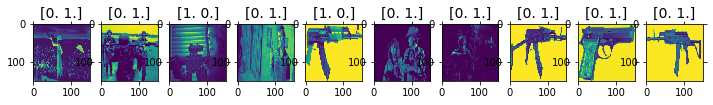

In [33]:
# Plotting test images
plot_images(test_imgs[0:10], rows=1, figsize=(12,12))

- Here handguns are represented with the one-hot encoding of [1, 0], and rifles are represented by [0,1]
- So, transforming the handgun and rifel labels

In [34]:
test_labels = test_labels[:,0]

In [35]:
test_labels

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1.], dtype=float32)

In [36]:
# predicting on test data
predictions = model.predict_generator(generator=test_batches, 
                                      steps= 20 // batch_size, 
                                      verbose=0)

In [37]:
predictions = np.round(predictions[:,0])
predictions

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)

#### <font color=orange>Plotting the predictions with a confusion matrix </font>

In [38]:
y_true = test_labels
y_pred= predictions
cm = confusion_matrix(y_true, y_pred)

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 1 14]
 [ 0  5]]


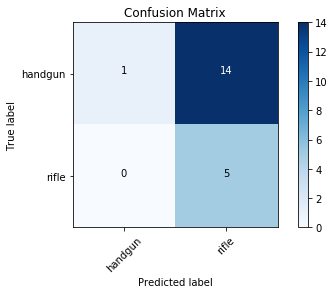

In [40]:
cm_plot_labels = ['handgun','rifle']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

-  Blue cells are correctly predicted while white cells are incorrectly predicted
-  Out of 20 test samples the model correctely predicted 15 samples (8+7)
-  Out of 20 test samples the model incorrectly predicted 5 samples (3+2)

### <font color=orange>Data augmentation</font>

- Generating more training data from existing training samples
- We will use the most common features of augmentations such as
 - rescale
 - shear_range
 - zoom_range
 - horizontal_flip
 - width_shift_range
 - height_shift_range

In [41]:
# Data preprocessing (Augmentation)
# Generate training set
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
        )

# generate testing set
# We use only rescaling augmentation configuration for test set 
test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_datagen_batches = train_datagen.flow_from_directory(
        directory =train_path, 
        target_size = (img_width, img_height),
        classes =['handgun', 'rifle'], 
        batch_size = batch_size)

Found 16342 images belonging to 2 classes.


In [45]:
print(train_datagen_batches.class_indices)

{'handgun': 0, 'rifle': 1}


##### <font color=blue> Augmentation for one picture to see the change of images</font>

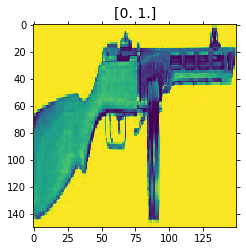

In [44]:
img = imgs[9]
plot_images([img], figsize=(8,8))

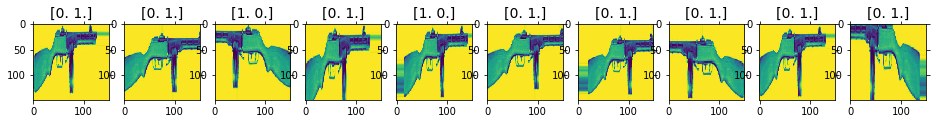

In [46]:
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
        )
        

batches = 0
max_batches = 10
img_gen = []
for x_batch in datagen.flow(img.reshape((1,) + img.shape), batch_size=max_batches):
    img_gen.append(x_batch[0])
    batches += 1
    if batches >= max_batches:
        # generator loops indefinetly
        break
        
plot_images(img_gen, rows=1, figsize=(16,10))

#### <font color=orange> Training CNN with augmentation</font>

In [18]:
history = model.fit_generator(generator=train_datagen_batches, 
                    steps_per_epoch= train_samples // batch_size,
                    epochs = epochs,
                    validation_data=valid_batches, 
                    validation_steps= validation_samples // batch_size, 
                    verbose=2)

Epoch 1/30
 - 94s - loss: 0.6934 - accuracy: 0.4926 - val_loss: 0.9220 - val_accuracy: 0.6525
Epoch 2/30
 - 93s - loss: 0.6870 - accuracy: 0.6208 - val_loss: 1.0607 - val_accuracy: 0.6650
Epoch 3/30
 - 85s - loss: 0.6855 - accuracy: 0.5934 - val_loss: 0.6315 - val_accuracy: 0.6750
Epoch 4/30
 - 83s - loss: 0.6804 - accuracy: 0.6156 - val_loss: 0.5880 - val_accuracy: 0.6675
Epoch 5/30
 - 84s - loss: 0.6794 - accuracy: 0.6070 - val_loss: 0.5146 - val_accuracy: 0.7025
Epoch 6/30
 - 89s - loss: 0.6774 - accuracy: 0.6086 - val_loss: 1.3747 - val_accuracy: 0.6500
Epoch 7/30
 - 90s - loss: 0.6762 - accuracy: 0.6074 - val_loss: 1.1082 - val_accuracy: 0.6800
Epoch 8/30
 - 84s - loss: 0.6743 - accuracy: 0.6106 - val_loss: 0.6986 - val_accuracy: 0.6900
Epoch 9/30
 - 84s - loss: 0.6735 - accuracy: 0.6078 - val_loss: 1.2934 - val_accuracy: 0.6580
Epoch 10/30
 - 86s - loss: 0.6695 - accuracy: 0.6192 - val_loss: 1.5733 - val_accuracy: 0.6625
Epoch 11/30
 - 85s - loss: 0.6700 - accuracy: 0.6138 - val_

In [51]:
#######

In [52]:
history_aug = model.fit_generator(generator=train_datagen_batches, 
                    steps_per_epoch= train_samples // batch_size,
                    epochs = epochs,
                    validation_data=valid_batches, 
                    validation_steps= validation_samples // batch_size, 
                    verbose=2)

Epoch 1/30
 - 101s - loss: 0.8035 - accuracy: 0.6116 - val_loss: 23.6935 - val_accuracy: 0.6800
Epoch 2/30
 - 101s - loss: 0.6318 - accuracy: 0.6431 - val_loss: 209.4533 - val_accuracy: 0.5775
Epoch 3/30
 - 102s - loss: 0.6220 - accuracy: 0.6406 - val_loss: 52.9055 - val_accuracy: 0.6700
Epoch 4/30
 - 103s - loss: 0.5956 - accuracy: 0.6614 - val_loss: 102.3034 - val_accuracy: 0.6775
Epoch 5/30
 - 111s - loss: 0.5852 - accuracy: 0.6800 - val_loss: 83.6573 - val_accuracy: 0.6900
Epoch 6/30
 - 96s - loss: 0.5928 - accuracy: 0.6648 - val_loss: 24.5106 - val_accuracy: 0.6725
Epoch 7/30
 - 91s - loss: 0.5807 - accuracy: 0.6780 - val_loss: 19.5270 - val_accuracy: 0.6750
Epoch 8/30
 - 101s - loss: 0.5774 - accuracy: 0.6788 - val_loss: 59.4218 - val_accuracy: 0.6900
Epoch 9/30
 - 132s - loss: 0.5781 - accuracy: 0.6782 - val_loss: 148.4452 - val_accuracy: 0.7050
Epoch 10/30
 - 141s - loss: 0.5746 - accuracy: 0.6883 - val_loss: 175.6339 - val_accuracy: 0.6700
Epoch 11/30
 - 144s - loss: 0.5900 - 

In [53]:
model.save('first_augment_CNNmodel_1.h5')

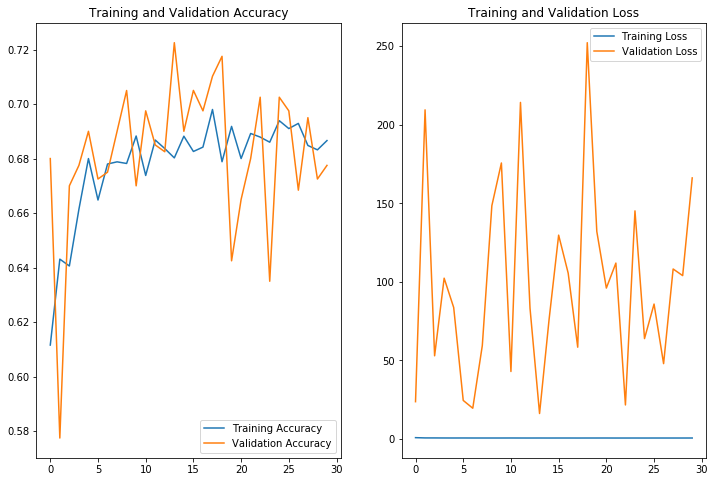

In [56]:
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']

loss=history_aug.history['loss']
val_loss=history_aug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### <font color=orange>To conclude</font>

- At this stage we see that
- Data augmentation alone improves the model accuracy (in our simple baseline model)
- But not the model loss
- Necessiate combination of other regularization techniques e.g dropout (dropping out output layer)
- Necessiate more complex CNN model

### <font color=orange>Fine tunning (with transfer learning)</font>

- To improve the accuracy we will apply pre-trained model 
 - VGG16 Image Classifier with Keras
- We will also add the 'other' weapon class in our model to see the variation of accuracy